# Togo Solar Data EDA

This notebook profiles, cleans, and explores Togo's solar dataset to prepare it for comparison and region-ranking tasks.

In [11]:
# togo_eda.ipynb

# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import sys
sys.path.append('../src')
from data_utils import summary_and_missing, detect_outliers, impute_median, clean_outliers
from scipy import stats

# Load data
df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

In [12]:
# Summary statistics and missing value report
summary_and_missing(df)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


Columns with >5% missing values:
Comments    100.0
dtype: float64


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [13]:
# Columns to check for outliers
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

detect_outliers(df, outlier_cols)

df_clean = clean_outliers(df, outlier_cols)
df_clean = impute_median(df_clean, outlier_cols)

# save the cleaned data
df_clean.to_csv('../data/togo_clean.csv', index=False)


Number of outliers per column:
GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


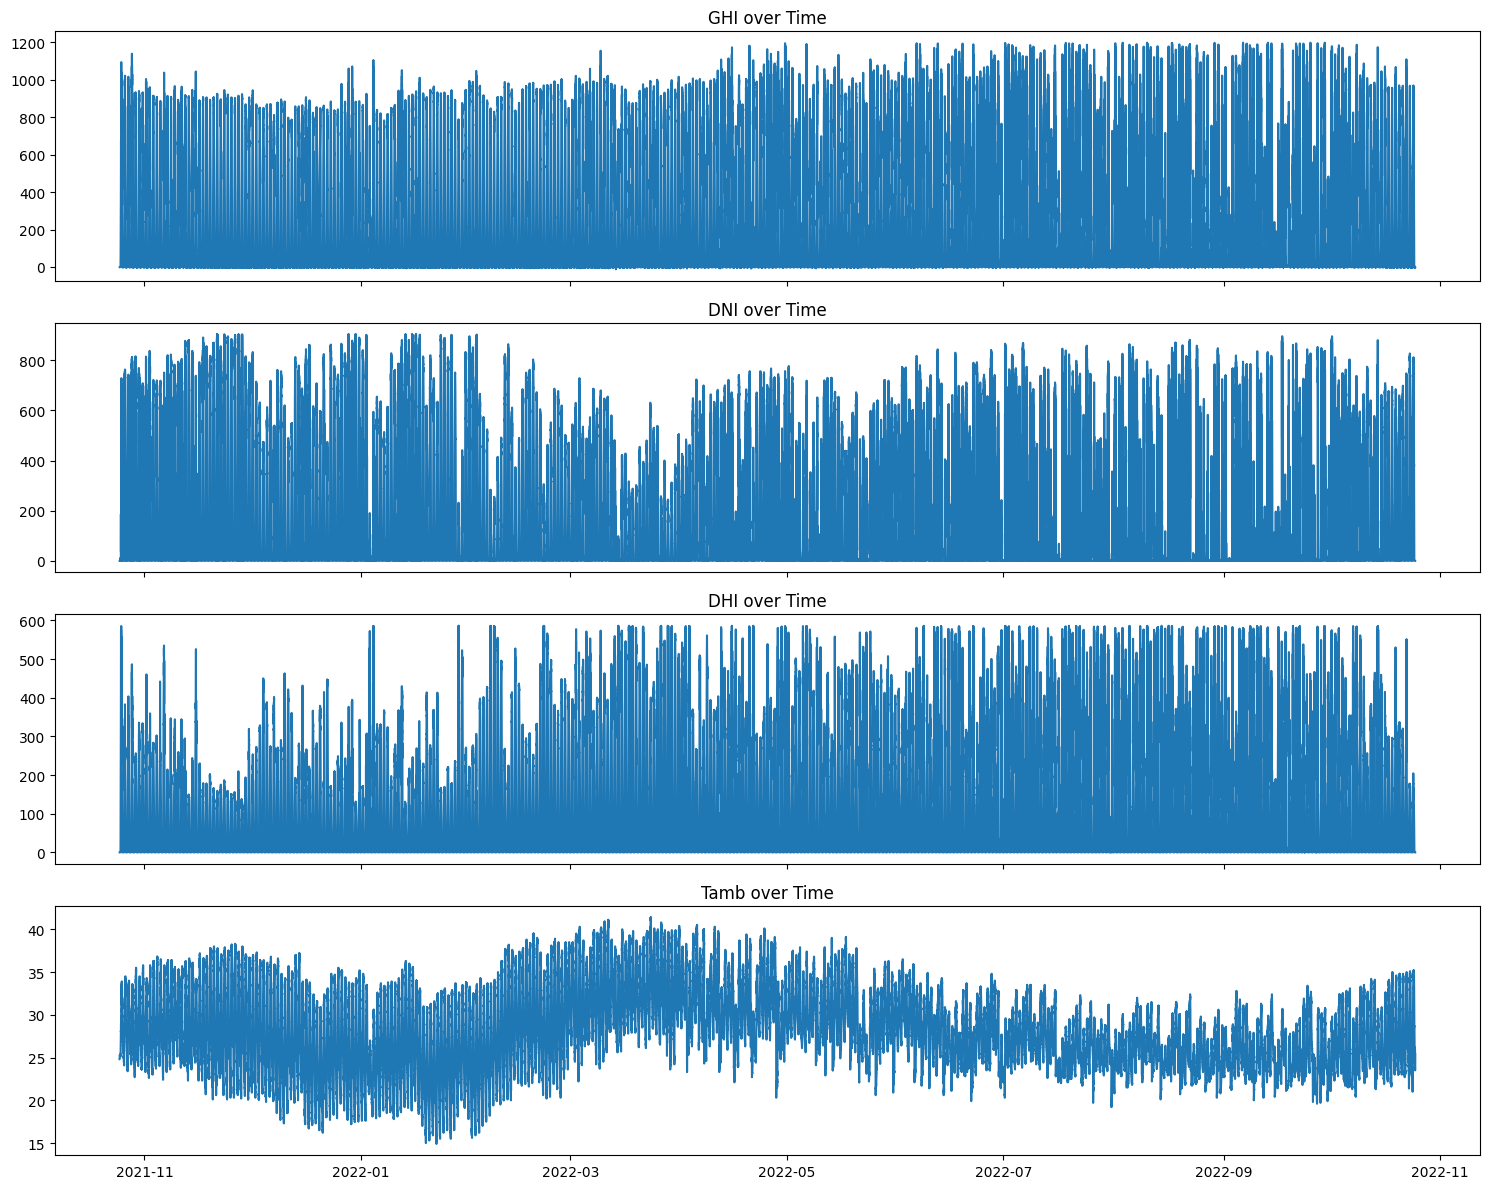

In [14]:
# Line plots for key variables
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    axs[i].plot(df_clean['Timestamp'], df_clean[col])
    axs[i].set_title(f'{col} over Time')
plt.tight_layout()
plt.show()

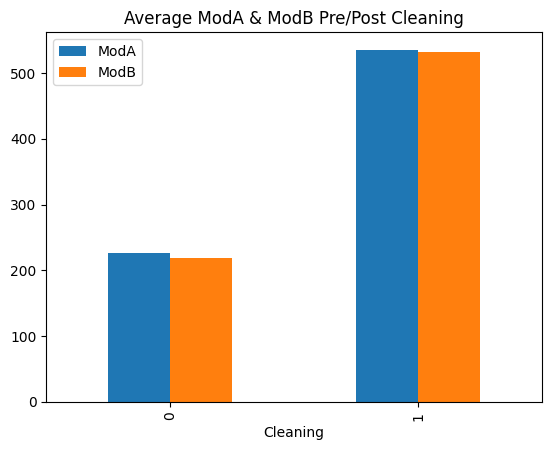

In [15]:
# Cleaning impact on ModA and ModB
if 'Cleaning' in df_clean.columns:
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
    plt.title('Average ModA & ModB Pre/Post Cleaning')
    plt.show()


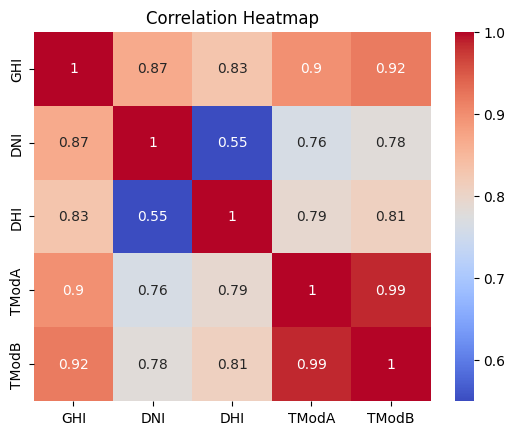

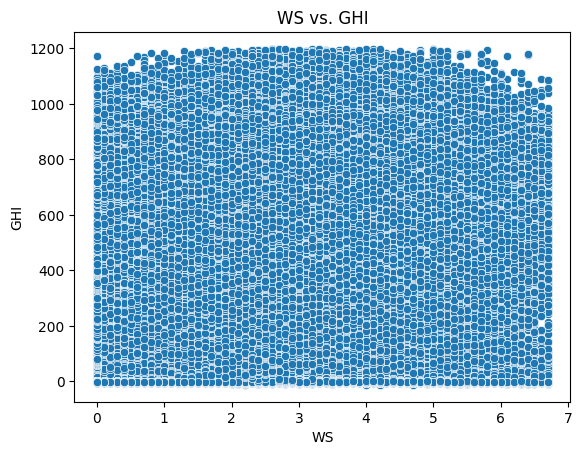

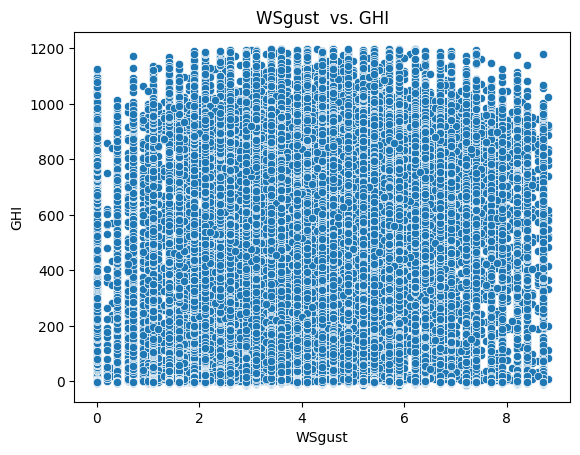

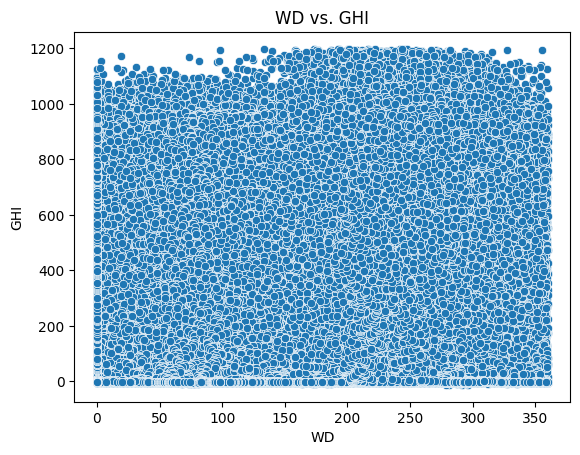

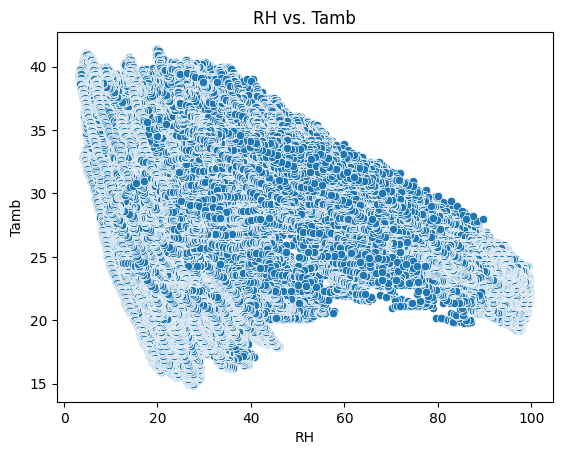

In [16]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title('WS vs. GHI')
plt.show()

sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title('WSgust  vs. GHI')
plt.show()

sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title('WD vs. GHI')
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title('RH vs. Tamb')
plt.show()

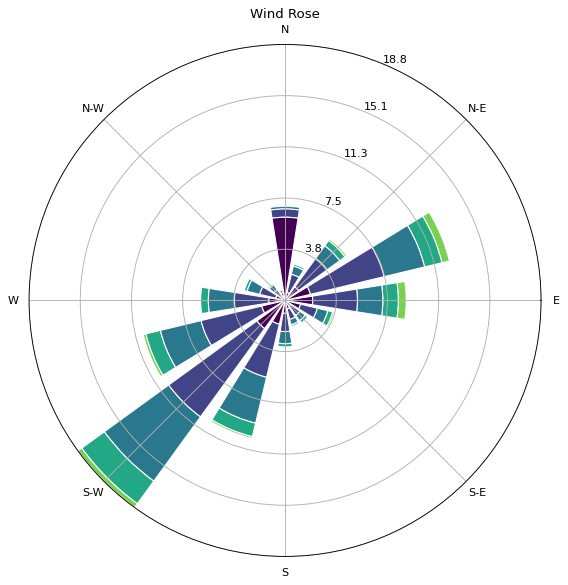

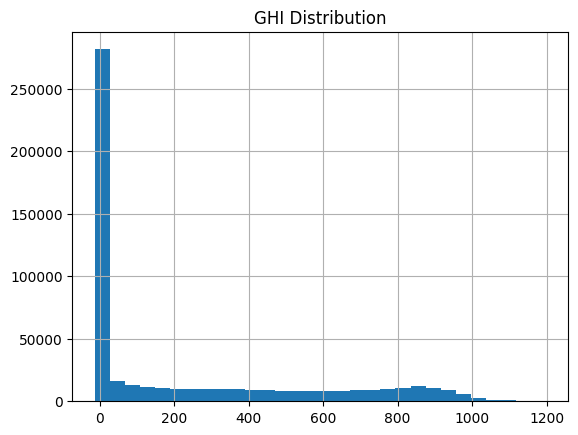

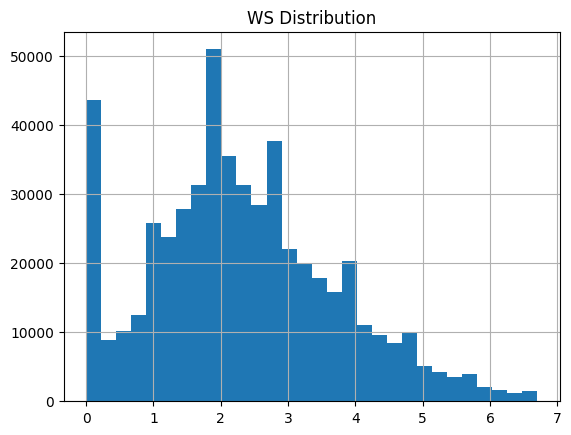

In [17]:
# Wind rose
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose')
plt.show()

# Histograms
df_clean['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.show()
df_clean['WS'].hist(bins=30)
plt.title('WS Distribution')
plt.show()

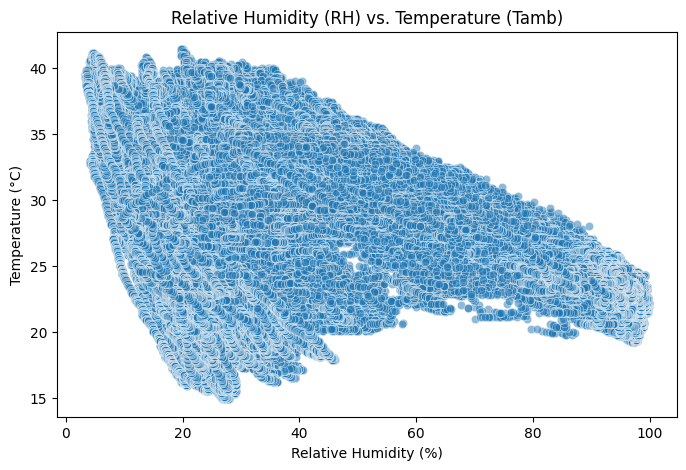

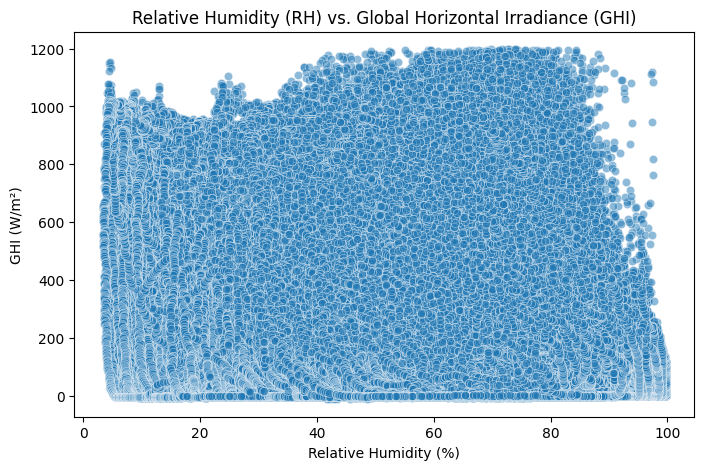

----------------------------------------------------------------------
Correlation between RH and Tamb: -0.4004104673516293
Correlation between RH and GHI: -0.2599487988417983


In [18]:
# Temperature Analysis: How RH influences Tamb and GHI

# Scatter plot: RH vs. Tamb
plt.figure(figsize=(8, 5))
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.5)
plt.title('Relative Humidity (RH) vs. Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.5)
plt.title('Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()
print("----------------------------------------------------------------------")
# Correlation coefficients
print("Correlation between RH and Tamb:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))

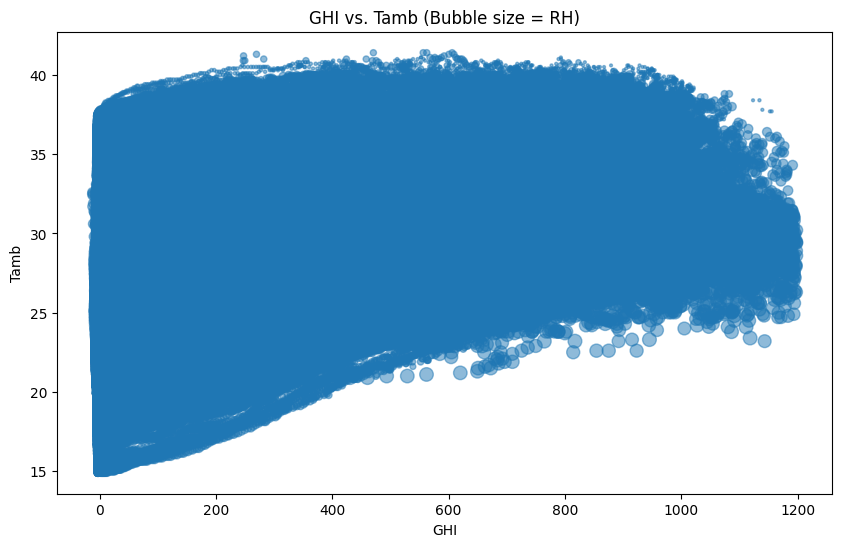

In [19]:

# Bubble plot: GHI vs. Tamb with bubble size as RH
plt.figure(figsize=(10,6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs. Tamb (Bubble size = RH)')
plt.show()